# Youngs Modulus Prediction for data with only refractory alloys #

In [1]:
# Loading the packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Loading the data
data = pd.read_csv("refractory_alloys.csv")
data = data.iloc[:,1:data.shape[1]]
colnames = data.columns[1:data.shape[1]-1]
print(colnames)

Index(['Diff. Lattice Constants', 'Diff. Melting Point', 'Mixing Enthalpy',
       'Lattice Constants', 'Lambda', 'Diff. in atomic radii', 'Omega',
       'Melting Temp.', 'Diff. Electronegativity', 'Mixing Entropy',
       'Valence electron'],
      dtype='object')


In [23]:
data.head()

,Alloy,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron,Young's Mod (GPa)
0,TaNbHfZrTi,0.129156,476.414945,2.644,3.19618,0.536462,4.994417,12769.215378,2523.0,0.118254,13.381611,4.4,49.8800
1,TiTa,0.175250,674.500000,1.388,3.12605,4.707131,1.106501,10859.876948,2615.5,0.020000,5.763146,4.5,110.7408
2,MoZr,0.042500,384.000000,-5.988,3.18950,0.088020,8.091706,2417.672605,2512.0,0.415000,5.763146,5.0,158.3784
3,MoW,0.009100,399.500000,-0.221,3.15610,134.225479,0.146520,42969.340957,3295.5,0.100000,2.881573,6.0,285.8335
4,WTa,0.068050,202.500000,-7.298,3.23325,0.567981,2.252413,1378.993459,3492.5,0.430000,2.881573,5.5,218.0652


## Pre Processing the data ##
Here we split the data into train and test set and standardized the data.

In [24]:
# Separating data
X = data.iloc[:,1:12]
Y = data.iloc[:,-1]


# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X))
scaled_X_train.columns = colnames
scaled_X_train.head()

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,-0.369143,-0.314550,1.215738,0.248822,-0.108071,0.027522,-0.135396,-0.064638,-1.064304,0.777453,-0.916637
1,0.095737,0.996515,1.021209,-0.838763,0.199120,-2.351827,-0.176196,0.236073,-1.884145,-1.711126,-0.674114
2,-1.243114,-0.926216,-0.121189,0.145228,-0.141101,1.923018,-0.356593,-0.100398,1.411773,-1.711126,0.538500
3,-1.579970,-0.823627,0.772006,-0.372744,9.738811,-2.939322,0.509934,2.446705,-1.216617,-2.652395,2.963730
4,-0.985429,-2.127510,-0.324082,0.823709,-0.105749,-1.650545,-0.378788,3.087138,1.536934,-2.652395,1.751115


In [25]:
# reading test data
test = pd.read_csv("Validation_set_features.csv")
X_test = test.iloc[:,2:13]
Y_test = test.iloc[:,-1]
# Standardizing the test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test))
scaled_X_test.columns = colnames
scaled_X_test.head()

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,-1.101285,-1.944683,0.433117,-0.316986,304.973660,-3.008655,-0.291046,1.125398,-0.003115,-2.099621,2.479169
1,-0.809233,-1.451784,0.360152,-0.284478,337.931480,-3.007392,-0.286150,1.092343,0.107208,-1.726267,2.384342
2,-1.000339,-1.633666,0.416974,-0.302201,379.896469,-3.009129,-0.273984,1.180893,0.031514,-1.818567,2.471723
3,-0.988256,-1.485832,0.392101,-0.285621,378.675888,-3.008059,-0.268141,1.207320,0.108172,-1.628463,2.438667
4,-0.942063,-1.169025,0.359057,-0.244347,438.532053,-3.008010,-0.255642,1.311029,0.189452,-1.307397,2.426032


## Gradient Boosting Regression ##

In [26]:
# Defining the parameters
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}
# Training the gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(**params, random_state = 1)
gbr.fit(scaled_X_train,Y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
# crossvalidating
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

cv_error = cross_val_score(gbr,scaled_X_train,Y,cv = 5, scoring = 'neg_mean_absolute_error')
print("The cross validated test score for the training data set is :",round(np.mean(cv_error),4))

The cross validated test score for the training data set is : -13.8284


In [28]:
# predicting for test set
pred = gbr.predict(scaled_X_test)
error = mean_absolute_error(Y_test,pred)
print("The Mean Absolute Error for the Test set is :", error)

The Mean Absolute Error for the Test set is : 8.32823740223228


In [29]:
# Grid Search For Hypermparameter Optimization

from sklearn.model_selection import GridSearchCV

# Defining the grid values
grid_value = {
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# Redefining the regressor
reg = GradientBoostingRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(scaled_X_train,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [30]:
print('Best parameter:',clf.best_params_)
print('Best Score:',clf.best_score_)

Best parameter: {'learning_rate': 0.7, 'n_estimators': 100}
Best Score: -13.635580490414688


In [32]:
# Creating the optimized parameter
opt_gbr = GradientBoostingRegressor(**clf.best_params_,random_state = 1)
opt_gbr.fit(scaled_X_train,Y)

# Predicting the results for the test set
test_pred = opt_gbr.predict(scaled_X_test)

#error
test_error = mean_absolute_error(Y_test,test_pred)
print("The test error is:",test_error)

The test error is: 17.679687034287756


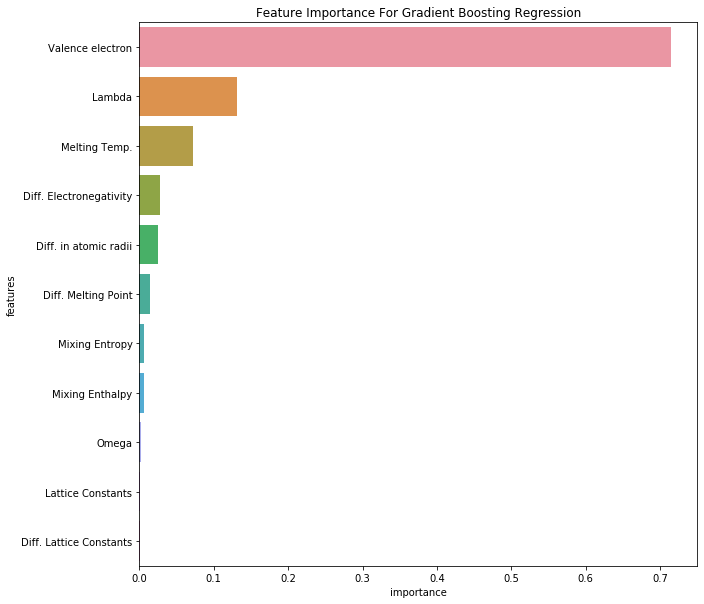

In [33]:
# Feature Importance
importance = list(opt_gbr.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)

# Visualization
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])
plt.title("Feature Importance For Gradient Boosting Regression")
plt.show()

## ADABOOST Regression ##

In [35]:
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(**params, random_state=1)

from sklearn.model_selection import cross_val_score
cv_error = cross_val_score(ada_reg, scaled_X_train, Y, cv = 10, scoring = 'neg_mean_absolute_error')
print("The cross validation errors is: ", cv_error)
print("Average Cross Validation Error: ", round(np.mean(cv_error),3))

The cross validation errors is:  [-23.65628652 -18.97912546  -9.80280559  -6.0494562  -18.90559212
  -5.79306819 -16.23146132  -8.83254271 -16.30080936 -16.59464825]
Average Cross Validation Error:  -14.115


In [39]:
# Fitting the model
ada_reg.fit(scaled_X_train,Y)

# Prediction for the test set
test_pred = ada_reg.predict(scaled_X_test)

# Error for prediction
from sklearn.metrics import mean_absolute_error
test_error = mean_absolute_error(Y_test,test_pred)
print("The Mean Absolute Error for test set is: ", test_error) 

The Mean Absolute Error for test set is:  10.368642249503967


In [40]:
# Grid Search 
grid_value = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

from sklearn.model_selection import GridSearchCV
# Redefining the regressor
reg = AdaBoostRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(scaled_X_train,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [41]:
print("Best Parameters: ",clf.best_params_)
print("Best Score: ", clf.best_score_)

Best Parameters:  {'learning_rate': 0.6, 'n_estimators': 100}
Best Score:  -13.926984014249072


In [43]:
# Training the optimized model
opt_ada_reg = AdaBoostRegressor(**clf.best_params_, random_state = 1)
opt_ada_reg.fit(scaled_X_train,Y)

# Predicting the result for test set
opt_test_pred = opt_ada_reg.predict(scaled_X_test)

# Error rate
opt_error = mean_absolute_error(Y_test, opt_test_pred)
print("Test set error for optimized parameters: ", round(opt_error,3))

Test set error for optimized parameters:  11.307


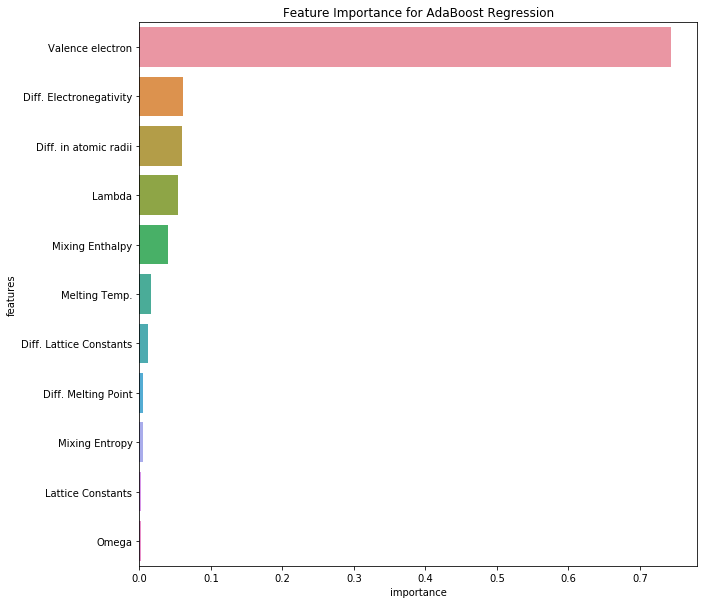

In [44]:
# Feature Importance 
importance = list(opt_ada_reg.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)

# Visualization
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])
plt.title("Feature Importance for AdaBoost Regression")
plt.show()

## XGBOOST Regression ##

In [45]:
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(**params, random_state=1)

from sklearn.model_selection import cross_val_score
cv_error = cross_val_score(xgb_reg, scaled_X_train, Y, cv = 5, scoring = 'neg_mean_absolute_error')
print("The cross validation errors is: ", cv_error)
print("Average Cross Validation Error: ", round(np.mean(cv_error),3))

The cross validation errors is:  [-25.23850984  -9.70065055 -10.7049636  -15.46696585 -11.92866669]
Average Cross Validation Error:  -14.608


In [46]:
# Fitting the model
xgb_reg.fit(scaled_X_train,Y)

# Prediction for the test set
test_pred = xgb_reg.predict(scaled_X_test)

# Error for prediction
from sklearn.metrics import mean_absolute_error
test_error = mean_absolute_error(Y_test,test_pred)
print("The Mean Absolute Error for test set is: ", test_error) 

The Mean Absolute Error for test set is:  18.60235595703125


In [50]:
# Grid Search 
grid_value = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

from sklearn.model_selection import GridSearchCV
# Redefining the regressor
reg = xgb.XGBRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(scaled_X_train,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid

In [51]:
print("Best Parameters: ",clf.best_params_)
print("Best Score: ", clf.best_score_)

Best Parameters:  {'learning_rate': 0.2, 'n_estimators': 200}
Best Score:  -13.786864123914217


In [52]:
# Training the optimized model
opt_xgb_reg = xgb.XGBRegressor(**clf.best_params_, random_state = 1)
opt_xgb_reg.fit(scaled_X_train,Y)

# Predicting the result for test set
opt_test_pred = opt_xgb_reg.predict(scaled_X_test)

# Error rate
opt_error = mean_absolute_error(Y_test, opt_test_pred)
print("Test set error for optimized parameters: ", round(opt_error,3))

Test set error for optimized parameters:  13.552


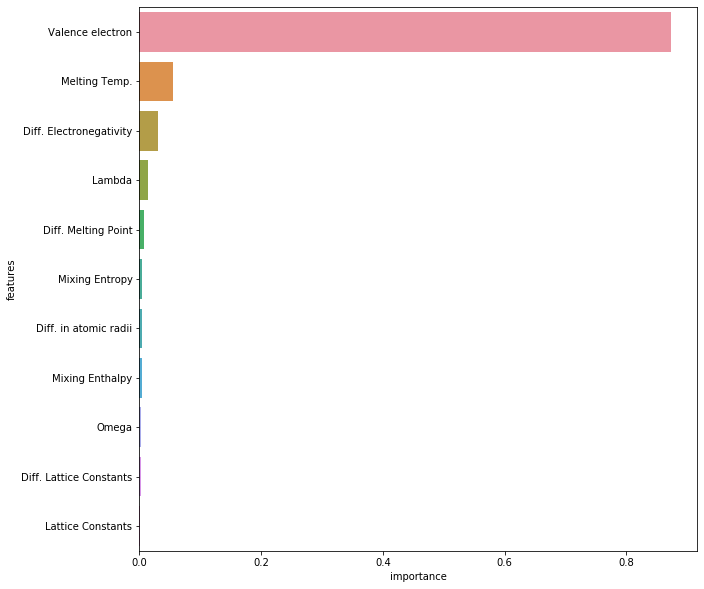

In [53]:
# Feature Importance 
importance = list(opt_xgb_reg.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])